### Get scripts

In [2]:
!wget https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/getData.py
!wget https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/constants.py

--2019-06-26 13:53:18--  https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/getData.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3586 (3.5K) [text/plain]
Saving to: ‘getData.py’

getData.py          100%[===================>]   3.50K  --.-KB/s    in 0s      

2019-06-26 13:53:18 (69.3 MB/s) - ‘getData.py’ saved [3586/3586]

--2019-06-26 13:53:24--  https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/constants.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512 [text/plain]
Saving to: ‘constant

### Download speech data

In [0]:
from getData import downloadSpeechData, getDataDict

In [4]:
downloadSpeechData(data_path='speechData/')

Extracting /content/speechData/train.tar.gz into /content/speechData/train
Extracting /content/speechData/test.tar.gz into /content/speechData/test


In [0]:
dataDict = getDataDict(data_path='speechData/')

In [6]:
len(dataDict['train']['files'])

51094

## Explore data

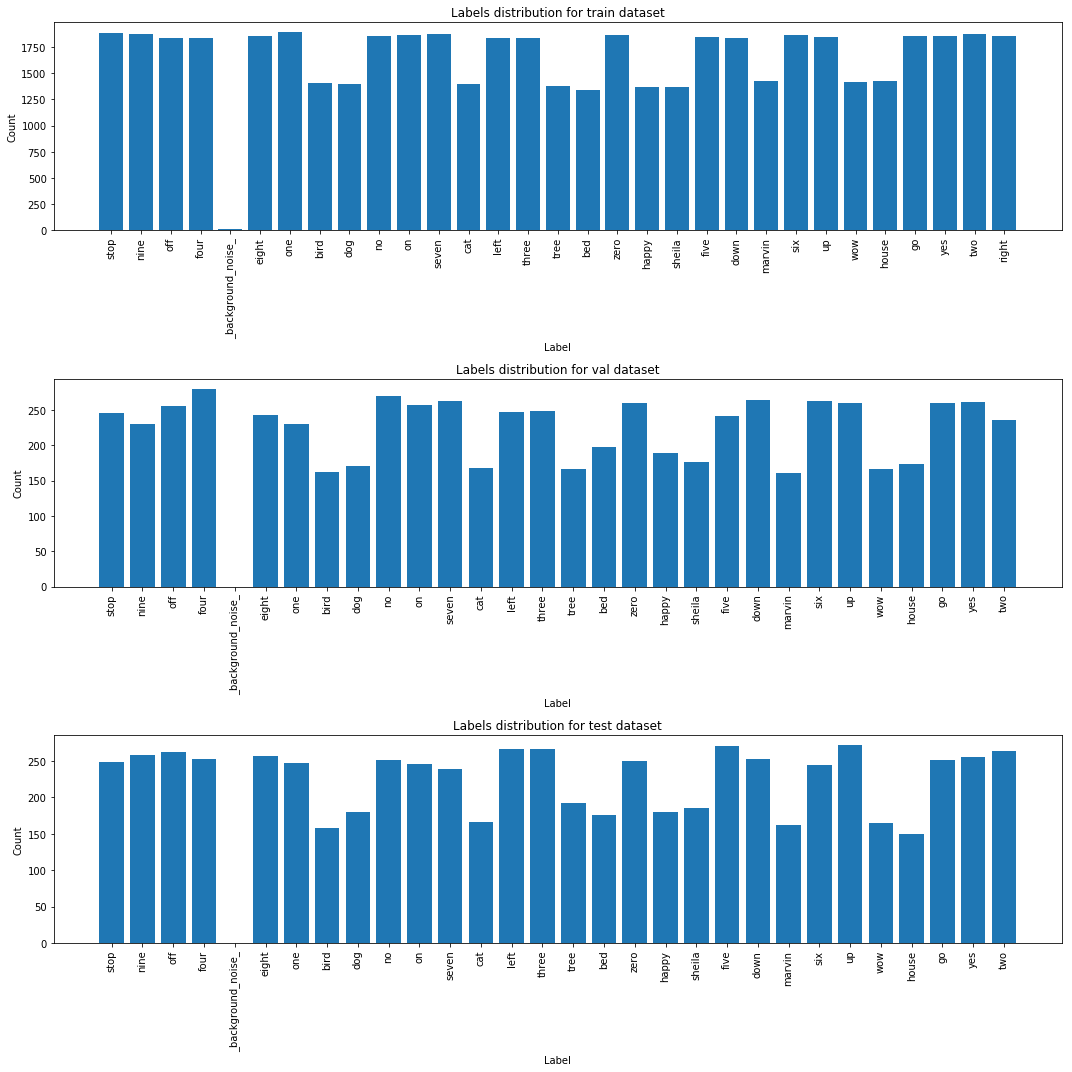

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
from constants import categories, inv_categories

def valueCount(dataset):
    value_count = Counter(dataDict[dataset]['labels'])
    counts = [value_count[i] for i in range(len(value_count))] 
    labels = [inv_categories[i] for i in range(len(value_count))]
    return counts, labels
    

datasets = ['train', 'val', 'test']


fix, ax = plt.subplots(3,1, figsize=(15,15))
for i, dataset in enumerate(datasets):
    counts, labels = valueCount(dataset)
    ax[i].bar(range(len(counts)), counts)
    ax[i].set_xticks(range(len(counts)))
    ax[i].set_xticklabels(labels, rotation=90)
    ax[i].set_xlabel('Label')
    ax[i].set_ylabel('Count')
    ax[i].set_title('Labels distribution for {} dataset'.format(dataset))

plt.tight_layout()
plt.show()

### Read wav files


In [13]:
from scipy.io import wavfile

f = dataDict['train']['files'][5]
sampling_rate, wave = wavfile.read(f)
print(sampling_rate)

16000


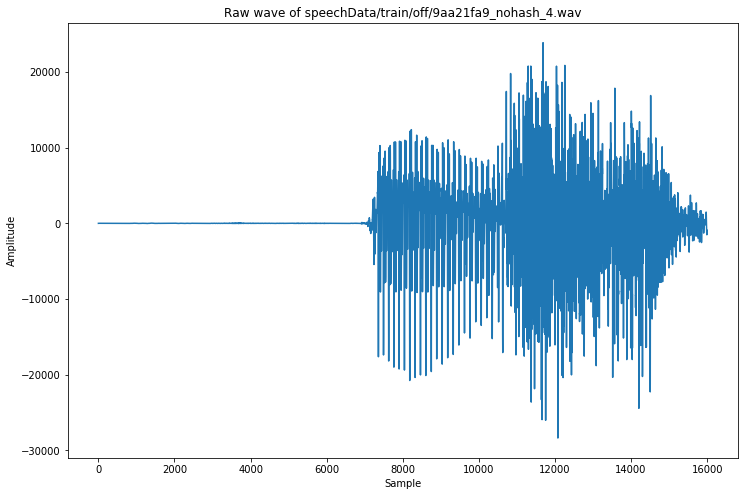

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()

### length of waves

In [23]:
lengths = list()
anomalies = []
shorter = []
for i, f in enumerate(dataDict['train']['files']):
    sampling_rate, wave = wavfile.read(f)#librosa.load(f, sr=None)
    lengths.append(len(wave))
    if len(wave)>16000:
        anomalies.append(i)
    if len(wave)<10000:
        shorter.append(i)

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [17]:
Counter(lengths)

Counter({5945: 1,
         6688: 4,
         6827: 3,
         7339: 2,
         7431: 11,
         7510: 3,
         7851: 1,
         8022: 3,
         8174: 17,
         8192: 30,
         8363: 1,
         8534: 1,
         8875: 39,
         8917: 35,
         9046: 4,
         9387: 4,
         9558: 62,
         9660: 57,
         9728: 1,
         9899: 3,
         10032: 1,
         10070: 1,
         10240: 91,
         10403: 78,
         10411: 1,
         10582: 1,
         10752: 2,
         10923: 143,
         11094: 1,
         11146: 141,
         11264: 4,
         11435: 1,
         11520: 1,
         11606: 204,
         11776: 4,
         11889: 187,
         11947: 5,
         12118: 5,
         12261: 3,
         12288: 223,
         12459: 2,
         12480: 1,
         12630: 4,
         12632: 216,
         12800: 5,
         12971: 332,
         13004: 1,
         13142: 6,
         13312: 5,
         13375: 273,
         13483: 2,
         13654: 368,
     

In [18]:
print(anomalies)

[1410, 6943, 29248, 31434, 39379, 40580]


/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


1522930
16000


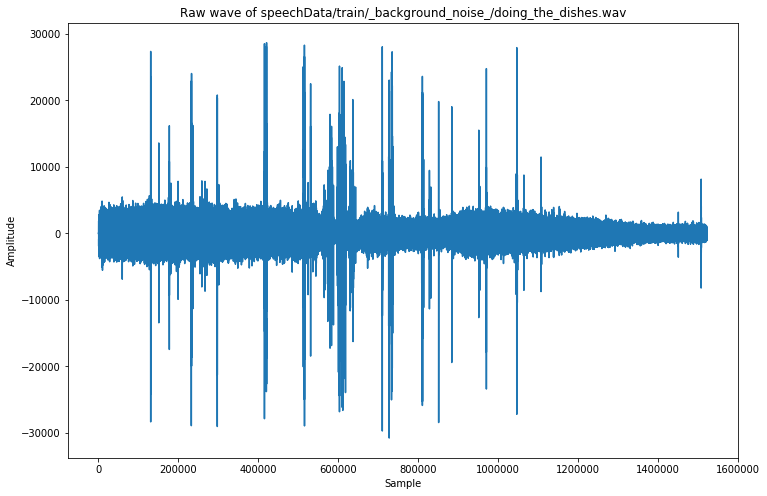

In [19]:
f = dataDict['train']['files'][anomalies[0]]
sampling_rate, wave = wavfile.read(f)
print(len(wave))
print(sampling_rate)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()

All related to background noise, we can delete them for the moment 
We can also split them in frames containing 16k samples.

For the shorter waves we can add random noise

Number of samples: 8022
Padded wave samples: 16000


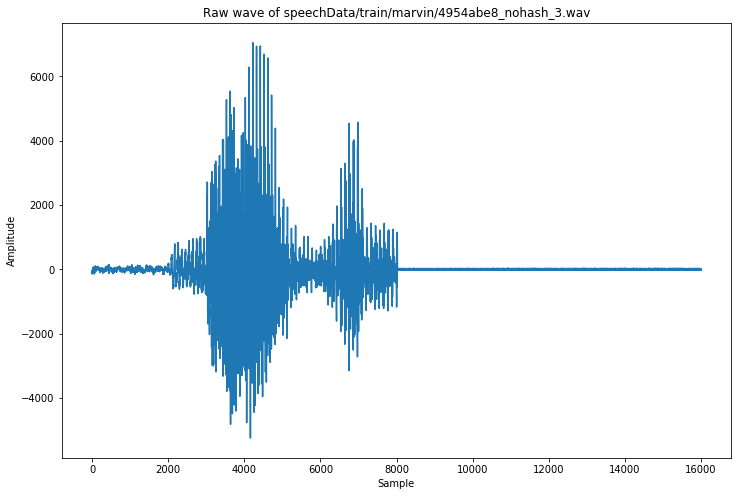

In [33]:
import numpy as np

f = dataDict['train']['files'][shorter[0]]
sampling_rate, wave = wavfile.read(f)
print("Number of samples: {}".format(len(wave)))

if len(wave) < 16000:
    silence_part = np.random.randint(-30, 30, 16000-len(wave))
    wave = np.append(np.asarray(wave), silence_part)
    print('Padded wave samples: {}'.format(len(wave)))
    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()

In [34]:
from IPython.display import Audio

Audio(wave,rate=16000)

## Audio features

In [35]:
!pip install python_speech_features

  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


(99, 26)


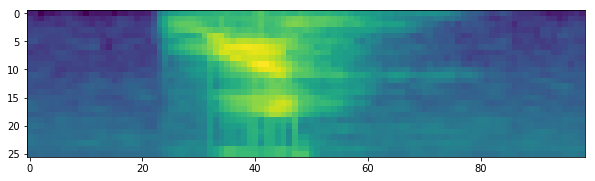

In [82]:
from python_speech_features import mfcc, logfbank

f = dataDict['train']['files'][1]
sampling_rate, wave = wavfile.read(f)

if len(wave) < 16000:
    silence_part = np.random.randint(-30, -30, 16000-len(wave))
    wave = np.append(np.asarray(wave), silence_part)
    
fbank = logfbank(wave, samplerate=16000, winlen=0.025, winstep=0.01, highfreq=16000/2)
print(fbank.shape)
fig = plt.figure(figsize=(10,10))
plt.imshow(fbank.T)
fig.show()

## fbank: A numpy array of size (NUMFRAMES by nfilt) containing features. Each row holds 1 feature vector.

(99, 13)


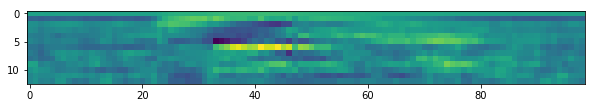

In [83]:
mfcc_feat = mfcc(wave, samplerate=16000, winlen=0.025, winstep=0.01, highfreq=16000/2)
print(mfcc_feat.shape)
fig = plt.figure(figsize=(10,10))
plt.imshow(mfcc_feat.T)
fig.show()

(66, 201)


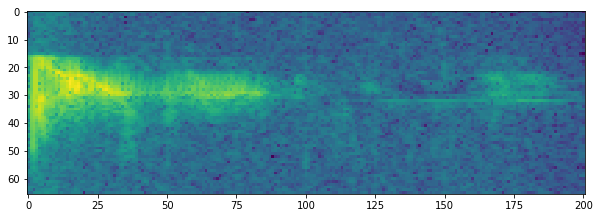

In [81]:
from scipy import signal

def log_specgram(audio, sample_rate, window_size=25,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

_, spectrogram = log_specgram(wave, 16000)
print(spectrogram.shape)
fig = plt.figure(figsize=(10,10))
plt.imshow(spectrogram)
fig.show()

## Test with Pandas DataFrame

In [0]:
import pandas as pd

In [0]:
trainDF = pd.DataFrame(dataDict['train'])
valDF = pd.DataFrame(dataDict['val'])
testDF = pd.DataFrame(dataDict['test'])

In [107]:
trainDF.head()

,files,labels
0,speechData/train/on/86fa2dcd_nohash_0.wav,10
1,speechData/train/one/70a00e98_nohash_2.wav,6
2,speechData/train/two/e53139ad_nohash_0.wav,29
3,speechData/train/left/611d2b50_nohash_2.wav,13
4,speechData/train/seven/7c75a504_nohash_0.wav,11


In [0]:
DFlist = [trainDF, valDF, testDF]

for df in DFlist:
    df['category'] = df.apply(lambda row: inv_categories[row['labels']], axis=1)

In [109]:
trainDF.head()

,files,labels,category
0,speechData/train/on/86fa2dcd_nohash_0.wav,10,on
1,speechData/train/one/70a00e98_nohash_2.wav,6,one
2,speechData/train/two/e53139ad_nohash_0.wav,29,two
3,speechData/train/left/611d2b50_nohash_2.wav,13,left
4,speechData/train/seven/7c75a504_nohash_0.wav,11,seven


In [114]:
trainDF.loc[trainDF['labels']==4, :]

,files,labels,category
1410,speechData/train/_background_noise_/doing_the_...,4,_background_noise_
6943,speechData/train/_background_noise_/running_ta...,4,_background_noise_
29248,speechData/train/_background_noise_/dude_miaow...,4,_background_noise_
31434,speechData/train/_background_noise_/white_nois...,4,_background_noise_
39379,speechData/train/_background_noise_/exercise_b...,4,_background_noise_
40580,speechData/train/_background_noise_/pink_noise...,4,_background_noise_


In [115]:
## Drop files containing background_noise 
for df in DFlist:
    df = df.loc[df['labels']!=4, :]
    
trainDF.head()

,files,labels,category
0,speechData/train/on/86fa2dcd_nohash_0.wav,10,on
1,speechData/train/one/70a00e98_nohash_2.wav,6,one
2,speechData/train/two/e53139ad_nohash_0.wav,29,two
3,speechData/train/left/611d2b50_nohash_2.wav,13,left
4,speechData/train/seven/7c75a504_nohash_0.wav,11,seven
